# Students Performance in Exams

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

In [2]:
#import necessary libtrary
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import data set
data = pd.read_csv("StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#find shape of data
data.shape

(1000, 8)

In [5]:
#check the values in the different categorical colums
print("Categories in 'gender' variable:     ",end=" " )
print(data['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(data['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(data['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(data['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(data['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [6]:
#find the data type data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
#check null values
null_counts = data.isnull().sum()
null_counts 

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

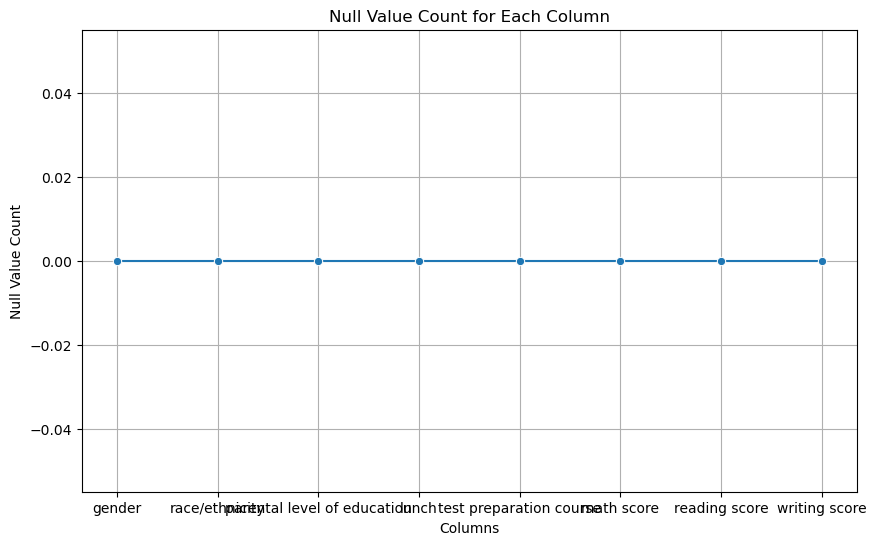

In [8]:
# Plot the line chart using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=null_counts.index, y=null_counts.values, marker='o')
plt.title('Null Value Count for Each Column')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.grid(True)
plt.show()

In [9]:
#check duplicate values
data.duplicated().sum()

0

In [10]:
#check invalid values in  numerical columns

# math score  should be between 0 and 100
invalid_feature_math = (data['math score'] < 0) | (data['math score'] > 100)
invalid_feature_math_sum = invalid_feature_math.sum()
print("Invalid values in math score: ", invalid_feature_math_sum)

# reading score  should be between 0 and 100
invalid_feature_read = (data['reading score'] < 0) | (data['reading score'] > 100)
invalid_feature_read_sum = invalid_feature_read.sum()
print("Invalid values in reading score: ", invalid_feature_read_sum)

# writing score  should be between 0 and 100
invalid_feature_writ = (data['writing score'] < 0) | (data['writing score'] > 100)
invalid_feature_writ_sum = invalid_feature_writ.sum()
print("Invalid values in writing score: ", invalid_feature_writ_sum)

Invalid values in math score:  0
Invalid values in reading score:  0
Invalid values in writing score:  0


In [11]:
#check invalid values in  categorical columns

# Check for invalid values in gender columns
data['gender'] = data['gender'].astype('category')
valid_categories_gender = set(['female' ,'male'])
invalid_categories_gender = ~data['gender'].isin(valid_categories_gender)
invalid_categories_gender_sum = invalid_categories_gender.sum()
print(f"Number of invalid categories in gender: {invalid_categories_gender_sum}")

# Check for invalid values in race/ethnicity
data['race/ethnicity'] = data['race/ethnicity'].astype('category')
valid_categories_race_ethnicity = set(['group B', 'group C', 'group A', 'group D' ,'group E'])
invalid_categories_race_ethnicity = ~data['race/ethnicity'].isin(valid_categories_race_ethnicity)
invalid_categories_race_ethnicity_sum = invalid_categories_race_ethnicity.sum()
print(f"Number of invalid categories in race_ethnicity: {invalid_categories_race_ethnicity_sum}")

# Check for invalid values in parental level of education
data['parental level of education'] = data['parental level of education'].astype('category')
valid_categories_ple = set(["bachelor's degree" ,'some college' ,"master's degree", "associate's degree",
 'high school', 'some high school'])
invalid_categories_ple = ~data['parental level of education'].isin(valid_categories_ple)
invalid_categories_ple_sum = invalid_categories_ple.sum()
print(f"Number of invalid categories in parental level of education: {invalid_categories_ple_sum}")

# Check for invalid values in lunch
data['lunch'] = data['lunch'].astype('category')
valid_categories_lunch = set(['standard' ,'free/reduced'])
invalid_categories_lunch = ~data['lunch'].isin(valid_categories_lunch)
invalid_categories_lunch_sum = invalid_categories_lunch.sum()
print(f"Number of invalid categories in lunch: {invalid_categories_lunch_sum}")

# Check for invalid values in test preparation course
data['test preparation course'] = data['test preparation course'].astype('category')
valid_categories_tpc = set(['none' ,'completed'])
invalid_categories_tpc = ~data['test preparation course'].isin(valid_categories_tpc)
invalid_categories_tpc_sum = invalid_categories_tpc.sum()
print(f"Number of invalid categories in test preparation course: {invalid_categories_tpc_sum}")




Number of invalid categories in gender: 0
Number of invalid categories in race_ethnicity: 0
Number of invalid categories in parental level of education: 0
Number of invalid categories in lunch: 0
Number of invalid categories in test preparation course: 0


In [12]:
#check static
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
#Checking the number of unique values of each column
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

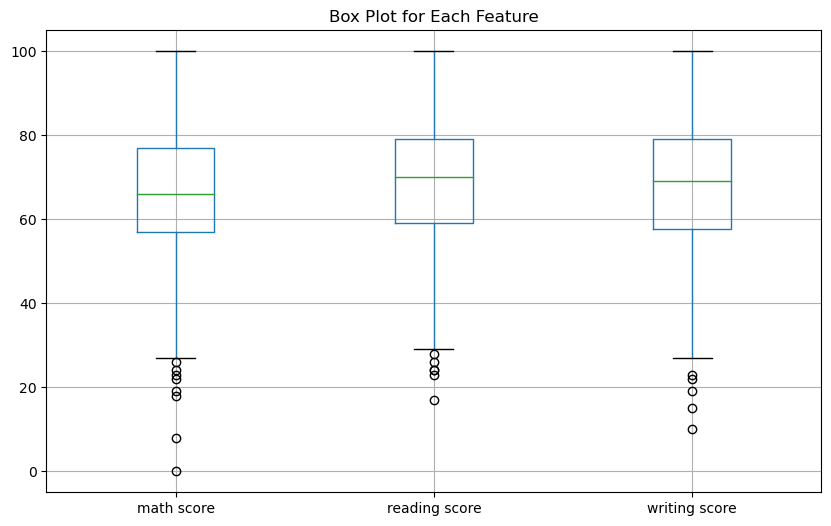

In [14]:
# Box plot for each feature
data.boxplot(figsize=(10, 6))
plt.title("Box Plot for Each Feature")
plt.show()

Math Score: The box plot shows many outliers below the whisker, indicating that there are several students who scored significantly lower than the rest. The median math score is around 65, and the lower outliers drop down to near 0.

Reading Score: The box plot shows fewer outliers compared to the math score but still has several lower outliers. The median reading score is around 70, and the lower outliers are also significant.

Writing Score: Similar to the reading score, the writing score also has a few lower outliers. The median writing score is slightly above 60, with the lower outliers being significant but fewer in number.

# Data Exploration


array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

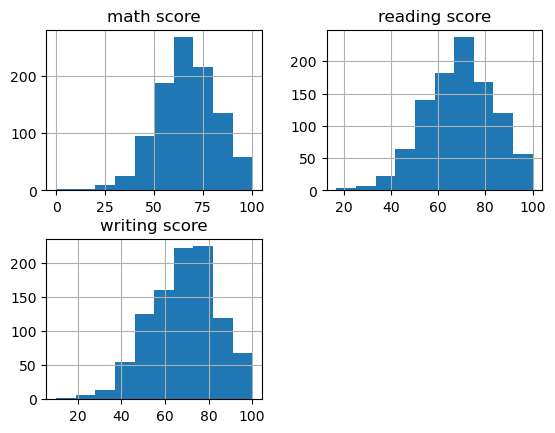

In [15]:
#plothistogram for numerical colums
data.hist()

In [18]:
#check Gender column value counts
data['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

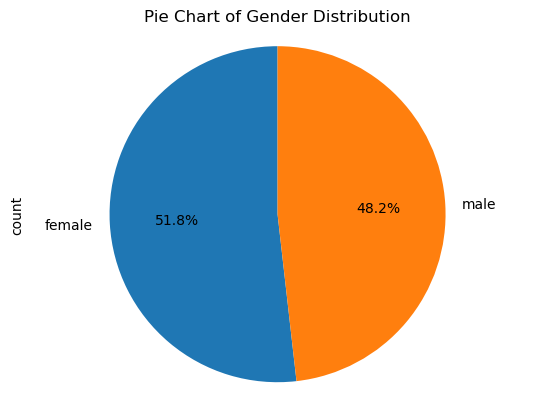

In [20]:
#plot a pie chart for Gender column

data['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

In [22]:
#check race/ethnicity column value counts
data['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

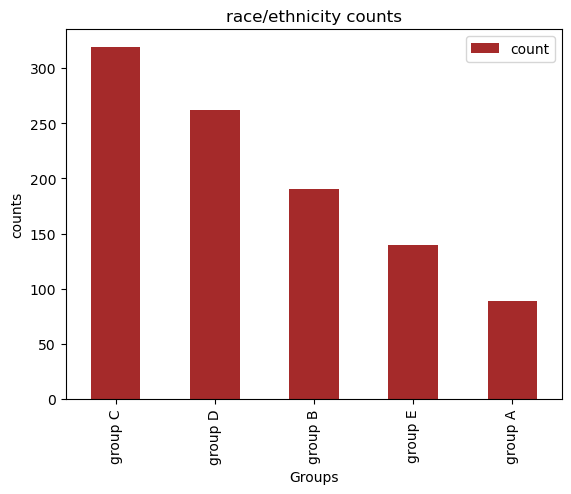

In [23]:
#plot bar graph for race/ethnicity column

data['race/ethnicity'].value_counts().plot(kind='bar',legend='false',color='brown')
plt.title('race/ethnicity counts')
plt.xlabel('Groups')
plt.ylabel('counts')
plt.show()

In [25]:
#check parental level of education column value counts
data['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

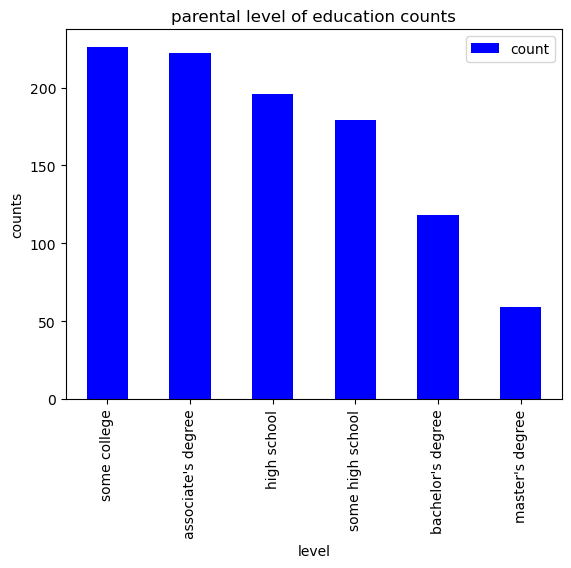

In [26]:
#plot bar graph for parental level of education column

data['parental level of education'].value_counts().plot(kind='bar',legend='false',color='blue')
plt.title('parental level of education counts')
plt.xlabel('level')
plt.ylabel('counts')
plt.show()

In [28]:
#check lunchr column value counts
data['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

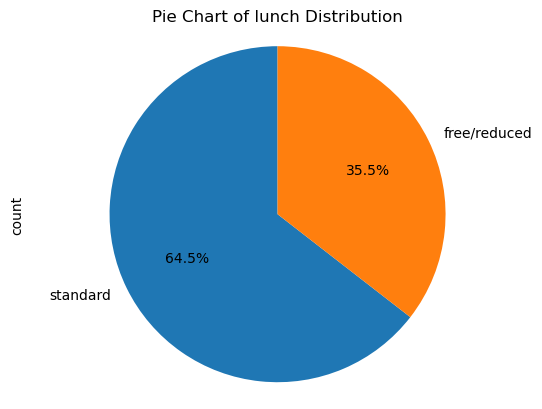

In [29]:
#plot a pie chart for lunch column

data['lunch'].value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of lunch Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

In [31]:
#check test preparation course column value counts
data['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

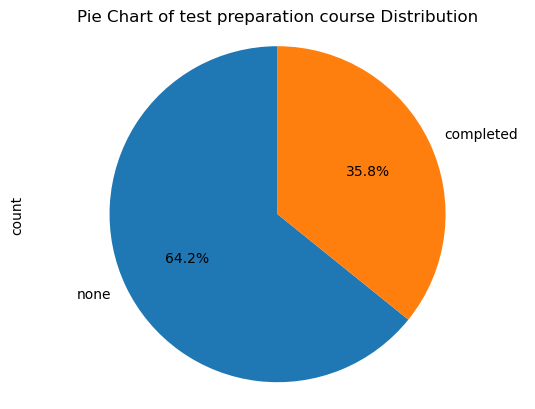

In [32]:
#plot a pie chart for test preparation course column

data['test preparation course'].value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of test preparation course Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

# Feature selection

In [36]:
#convert categorical data into numerical data using one-hot encoding
data = pd.get_dummies(data,columns = ['gender','race/ethnicity','parental level of education','lunch','test preparation course'],dtype = int)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   math score                                      1000 non-null   int64
 1   reading score                                   1000 non-null   int64
 2   writing score                                   1000 non-null   int64
 3   gender_female                                   1000 non-null   int32
 4   gender_male                                     1000 non-null   int32
 5   race/ethnicity_group A                          1000 non-null   int32
 6   race/ethnicity_group B                          1000 non-null   int32
 7   race/ethnicity_group C                          1000 non-null   int32
 8   race/ethnicity_group D                          1000 non-null   int32
 9   race/ethnicity_group E                          1000 non-null   

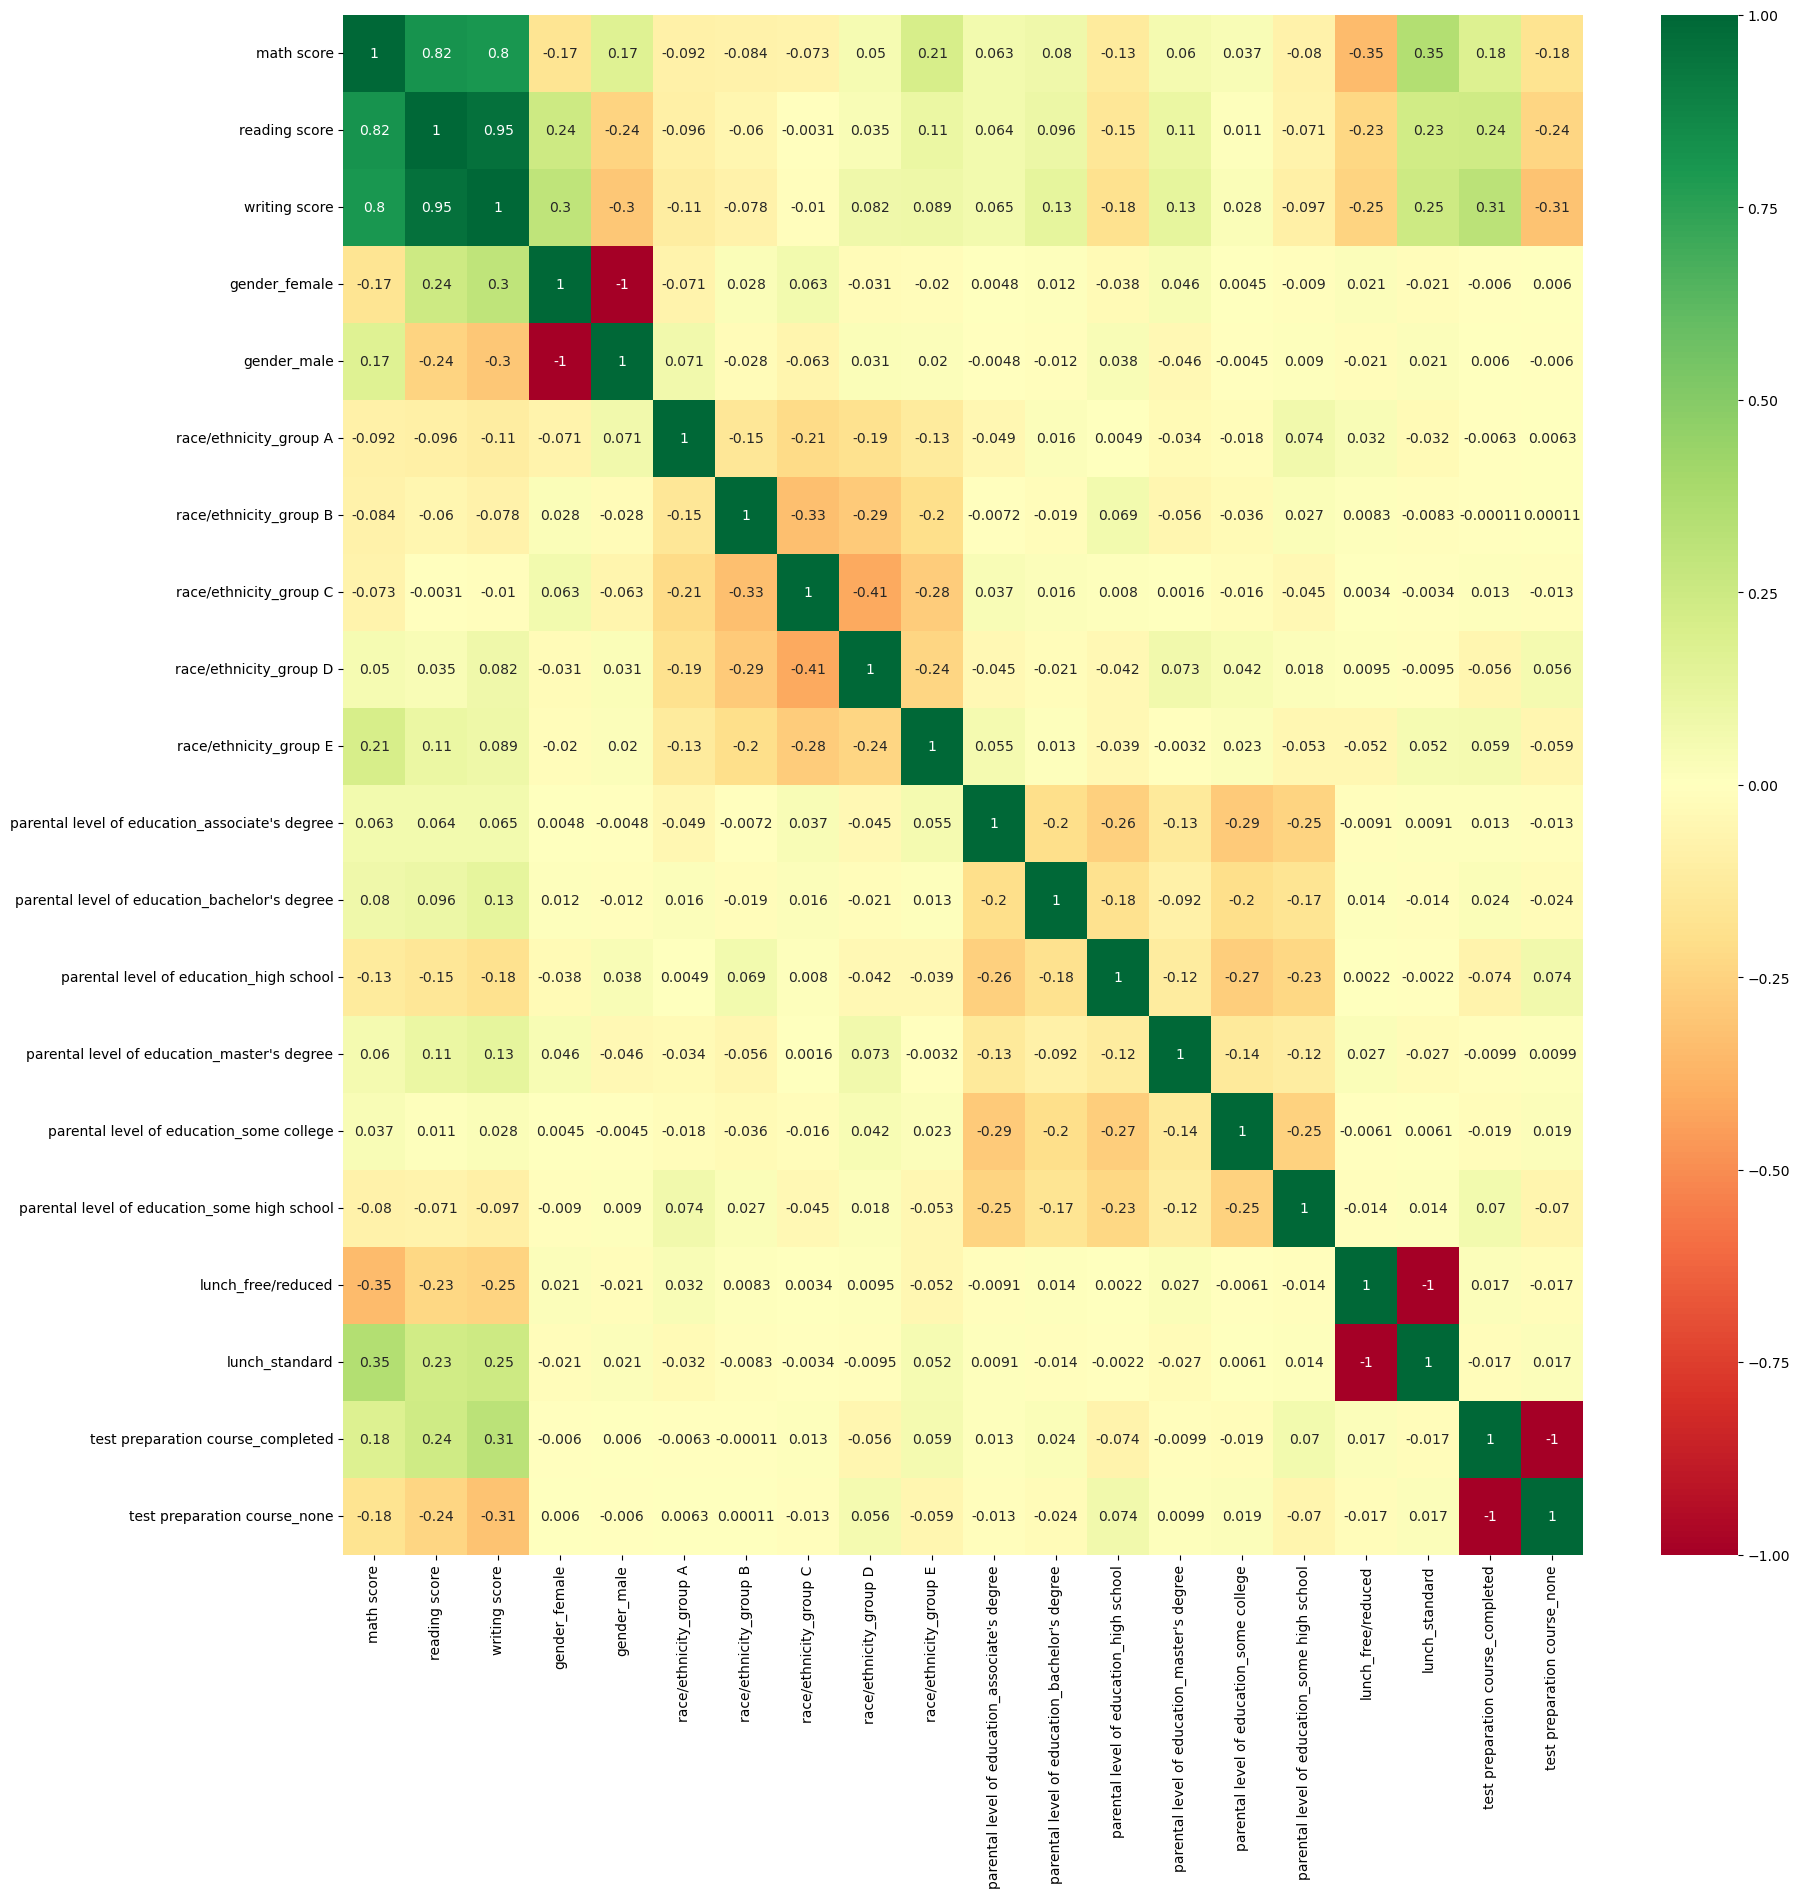

In [38]:
#feature selection
import seaborn as sns

#get correlations of each features in data set
corr_matrix = data.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(20,20))
#plot heat map
g =sns.heatmap(data[top_corr_features].corr(),annot = True,cmap="RdYlGn")

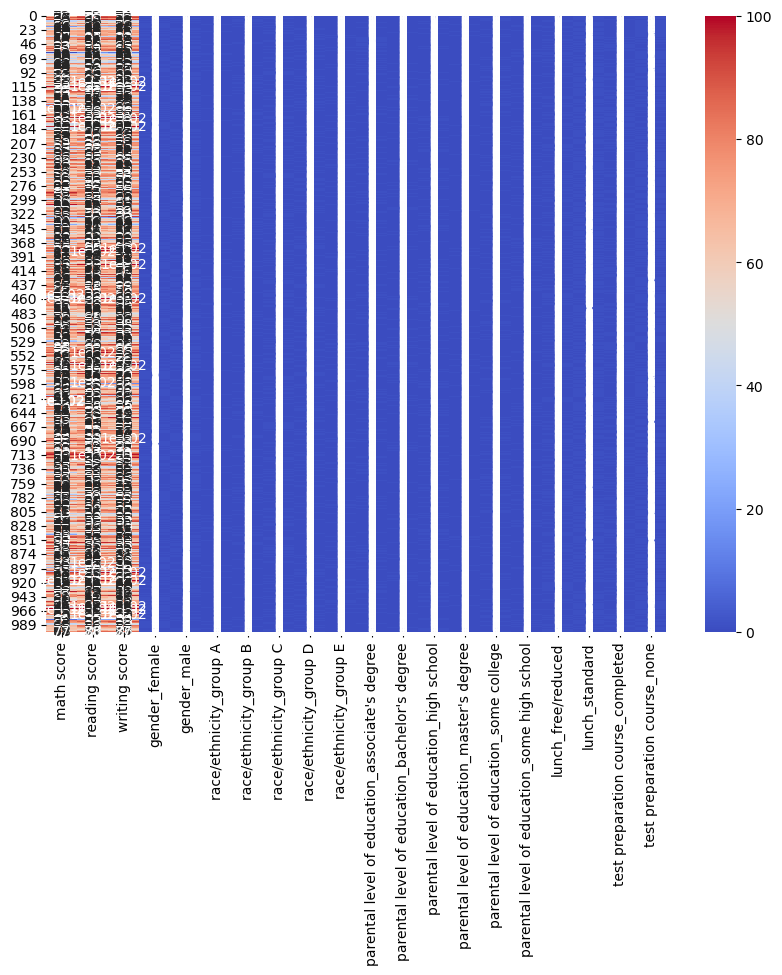

In [39]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data, annot=True, cmap='coolwarm')
plt.show()